# Chapter 11

In [406]:
import numpy as np
import pandas as pd

In [407]:
from datetime import datetime

In [408]:
now = datetime.now()

In [409]:
now

datetime.datetime(2019, 11, 5, 13, 1, 40, 154205)

In [410]:
now.year,now.month,now.day

(2019, 11, 5)

In [411]:
delta = datetime(2011,1,7) - datetime(2008,6,24,8,15)

In [412]:
delta


datetime.timedelta(days=926, seconds=56700)

In [413]:
delta.days

926

In [414]:
delta.seconds

56700

In [415]:
from datetime import timedelta

In [416]:
start = datetime(2011, 1, 7)


In [417]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [418]:
2 * timedelta(12)

datetime.timedelta(days=24)

In [419]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

In [420]:
stamp = datetime(2011, 1, 3)

In [421]:
stamp

datetime.datetime(2011, 1, 3, 0, 0)

In [422]:
str(stamp)

'2011-01-03 00:00:00'

In [423]:
stamp.strftime("%Y-%m-%d")

'2011-01-03'

In [424]:
value = '2011-01-03'

In [425]:
datetime.strptime(value,'%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [426]:
datestrs = ['7/6/2011', '8/6/2011']

In [427]:
[datetime.strptime(x,'%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [428]:
from dateutil.parser import parse

In [429]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [430]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [431]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [432]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [433]:
idx = pd.to_datetime(datestrs + [None])

In [434]:
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [435]:
idx[2]

NaT

In [436]:
pd.isnull(idx)

array([False, False,  True])

# 11.2 Time Series Basics

In [437]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
datetime(2011, 1, 7), datetime(2011, 1, 8),
datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02    0.151635
2011-01-05    0.773361
2011-01-07    0.078898
2011-01-08   -0.817992
2011-01-10    0.527850
2011-01-12   -1.059382
dtype: float64

In [438]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [439]:
ts+1

2011-01-02    1.151635
2011-01-05    1.773361
2011-01-07    1.078898
2011-01-08    0.182008
2011-01-10    1.527850
2011-01-12   -0.059382
dtype: float64

In [440]:
ts[::2]

2011-01-02    0.151635
2011-01-07    0.078898
2011-01-10    0.527850
dtype: float64

In [441]:
ts+ts[::2]

2011-01-02    0.303270
2011-01-05         NaN
2011-01-07    0.157796
2011-01-08         NaN
2011-01-10    1.055701
2011-01-12         NaN
dtype: float64

In [442]:
ts.index.dtype

dtype('<M8[ns]')

In [443]:
stamp = ts.index[0]

In [444]:
stamp

Timestamp('2011-01-02 00:00:00')

# Indexing, Selection, Subsetting

In [445]:
stamp = ts.index[2]

In [446]:
stamp

Timestamp('2011-01-07 00:00:00')

In [447]:
ts[stamp]

0.07889820474883603

In [448]:
ts['1/10/2011']

0.5278502674672457

In [449]:
ts['20110110']

0.5278502674672457

In [450]:
longer_ts = pd.Series(np.random.randn(1000),
 index=pd.date_range('1/1/2000', periods=1000))

In [451]:
longer_ts

2000-01-01    1.342803
2000-01-02    0.809612
2000-01-03    0.491341
2000-01-04   -1.527771
2000-01-05   -0.879572
2000-01-06    0.345538
2000-01-07   -0.122441
2000-01-08   -0.705645
2000-01-09   -0.488253
2000-01-10    0.694825
2000-01-11   -0.730164
2000-01-12    1.218890
2000-01-13   -0.736594
2000-01-14    1.197495
2000-01-15   -0.248909
2000-01-16    0.655867
2000-01-17    0.641981
2000-01-18    0.038631
2000-01-19   -0.710536
2000-01-20    0.144491
2000-01-21   -1.217016
2000-01-22    0.044861
2000-01-23    0.131522
2000-01-24   -0.025924
2000-01-25   -1.054130
2000-01-26    0.383121
2000-01-27   -0.171120
2000-01-28    0.604059
2000-01-29   -1.068679
2000-01-30   -0.393111
                ...   
2002-08-28    2.010179
2002-08-29   -1.807539
2002-08-30   -0.048547
2002-08-31    0.128030
2002-09-01   -0.426492
2002-09-02   -0.529412
2002-09-03    0.571177
2002-09-04    1.376202
2002-09-05    0.484297
2002-09-06    0.826852
2002-09-07    1.372676
2002-09-08    0.591790
2002-09-09 

In [452]:
longer_ts['2001']

2001-01-01   -0.105214
2001-01-02   -0.714973
2001-01-03   -0.381255
2001-01-04   -0.454580
2001-01-05   -0.301992
2001-01-06    0.537410
2001-01-07    0.041289
2001-01-08    0.479134
2001-01-09   -2.332571
2001-01-10   -0.931095
2001-01-11    0.573809
2001-01-12    1.742869
2001-01-13    1.281731
2001-01-14    0.758703
2001-01-15   -0.937337
2001-01-16    1.981896
2001-01-17   -1.884957
2001-01-18   -0.639077
2001-01-19   -0.415399
2001-01-20    0.153354
2001-01-21   -1.559445
2001-01-22   -1.535009
2001-01-23   -0.153037
2001-01-24    1.925571
2001-01-25    0.589010
2001-01-26   -1.420773
2001-01-27   -0.636535
2001-01-28    2.170632
2001-01-29   -0.086592
2001-01-30   -0.376243
                ...   
2001-12-02   -0.223195
2001-12-03    0.973762
2001-12-04   -1.678413
2001-12-05    0.704604
2001-12-06   -0.664383
2001-12-07    1.256434
2001-12-08    1.244709
2001-12-09    0.767839
2001-12-10   -0.155282
2001-12-11   -0.448635
2001-12-12    0.847489
2001-12-13   -0.017828
2001-12-14 

In [453]:
longer_ts['2001-05']

2001-05-01    0.783274
2001-05-02   -1.415962
2001-05-03    0.343359
2001-05-04    0.195403
2001-05-05    0.038485
2001-05-06   -1.060924
2001-05-07    0.059279
2001-05-08   -0.134325
2001-05-09    0.114474
2001-05-10    1.156239
2001-05-11   -1.684480
2001-05-12   -1.227292
2001-05-13   -0.741656
2001-05-14    0.773247
2001-05-15    1.112390
2001-05-16   -1.105065
2001-05-17    0.435019
2001-05-18   -0.859588
2001-05-19   -0.657348
2001-05-20    0.849515
2001-05-21    0.477295
2001-05-22    1.012260
2001-05-23    1.028489
2001-05-24   -0.630758
2001-05-25    2.127367
2001-05-26   -1.097937
2001-05-27   -0.743219
2001-05-28    0.559736
2001-05-29    0.499084
2001-05-30    0.691288
2001-05-31    0.886810
Freq: D, dtype: float64

In [454]:
ts[datetime(2011,1,7):]

2011-01-07    0.078898
2011-01-08   -0.817992
2011-01-10    0.527850
2011-01-12   -1.059382
dtype: float64

In [455]:
ts['1/6/2011':'1/11/2011']

2011-01-07    0.078898
2011-01-08   -0.817992
2011-01-10    0.527850
dtype: float64

In [456]:
ts.truncate(after='1/9/2011')

2011-01-02    0.151635
2011-01-05    0.773361
2011-01-07    0.078898
2011-01-08   -0.817992
dtype: float64

In [457]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')

In [458]:
dates

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

In [459]:
long_df = pd.DataFrame(np.random.randn(100, 4),
index=dates,
columns=['Colorado', 'Texas',
'New York', 'Ohio'])
long_df

,Colorado,Texas,New York,Ohio
2000-01-05,0.986407,-2.185470,1.801579,-1.371460
2000-01-12,1.247711,1.893170,1.169509,-0.741618
2000-01-19,-1.147244,0.293629,0.374552,-0.077177
2000-01-26,0.469966,1.178507,-0.785131,-0.264335
2000-02-02,-0.496364,-0.435448,-0.105986,1.759230
2000-02-09,-0.291410,-1.443603,0.773715,-2.264754
2000-02-16,0.336965,-0.456354,1.601100,-0.542373
2000-02-23,0.081020,-0.407329,0.285226,-0.187008
2000-03-01,0.312763,-0.287023,-0.938300,0.233753
2000-03-08,0.729007,0.960214,0.758894,0.232017


In [460]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-1.135514,0.507063,-1.240630,-0.478651
2001-05-09,0.130180,-0.390727,1.020646,0.411682
2001-05-16,1.198531,0.510128,-1.317256,-0.869983
2001-05-23,-0.729932,-0.914597,1.252262,-0.803063
2001-05-30,-0.810732,-0.048928,-0.479406,0.946488


In [461]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
'1/2/2000', '1/3/2000'])
dates

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-02', '2000-01-02',
               '2000-01-03'],
              dtype='datetime64[ns]', freq=None)

In [462]:
dup_ts = pd.Series(np.arange(5), index=dates)

In [463]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [464]:
dup_ts.index.is_unique

False

In [465]:
dup_ts['1/3/2000'] # not duplicated

4

In [466]:
dup_ts['1/2/2000'] # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [467]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [468]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

# 11.3 Date Ranges, Frequencies, and Shifting

In [469]:
ts

2011-01-02    0.151635
2011-01-05    0.773361
2011-01-07    0.078898
2011-01-08   -0.817992
2011-01-10    0.527850
2011-01-12   -1.059382
dtype: float64

In [470]:
resampler = ts.resample('D')
resampler

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [471]:
pd.DataFrame(resampler)

,0,1
0,2011-01-02,2011-01-02 0.151635 dtype: float64
1,2011-01-03,"Series([], dtype: float64)"
2,2011-01-04,"Series([], dtype: float64)"
3,2011-01-05,2011-01-05 0.773361 dtype: float64
4,2011-01-06,"Series([], dtype: float64)"
5,2011-01-07,2011-01-07 0.078898 dtype: float64
6,2011-01-08,2011-01-08 -0.817992 dtype: float64
7,2011-01-09,"Series([], dtype: float64)"
8,2011-01-10,2011-01-10 0.52785 dtype: float64
9,2011-01-11,"Series([], dtype: float64)"


# Generating Date Ranges

In [472]:
index = pd.date_range('2018-04-01','2018-06-01')
index

DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20',
               '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24',
               '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-28',
               '2018-04-29', '2018-04-30', '2018-05-01', '2018-05-02',
               '2018-05-03', '2018-05-04', '2018-05-05', '2018-05-06',
               '2018-05-07', '2018-05-08', '2018-05-09', '2018-05-10',
               '2018-05-11', '2018-05-12', '2018-05-13', '2018-05-14',
               '2018-05-15', '2018-05-16', '2018-05-17', '2018-05-18',
               '2018-05-19', '2018-05-20', '2018-05-21', '2018-05-22',
               '2018-05-23', '2018-05-24', '2018-05-25', '2018-05-26',
      

In [473]:
pd.date_range(start='2018-04-01', periods=20)

DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20'],
              dtype='datetime64[ns]', freq='D')

In [474]:
pd.date_range(end='2018-06-01', periods=20)

DatetimeIndex(['2018-05-13', '2018-05-14', '2018-05-15', '2018-05-16',
               '2018-05-17', '2018-05-18', '2018-05-19', '2018-05-20',
               '2018-05-21', '2018-05-22', '2018-05-23', '2018-05-24',
               '2018-05-25', '2018-05-26', '2018-05-27', '2018-05-28',
               '2018-05-29', '2018-05-30', '2018-05-31', '2018-06-01'],
              dtype='datetime64[ns]', freq='D')

In [475]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [476]:
pd.date_range('2018-05-02 12:56:31', periods=5)

DatetimeIndex(['2018-05-02 12:56:31', '2018-05-03 12:56:31',
               '2018-05-04 12:56:31', '2018-05-05 12:56:31',
               '2018-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [477]:
pd.date_range('2012-05-02 12:56:31', periods=5 , normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

# Frequencies and Date Offsets

In [478]:
from pandas.tseries.offsets import Hour, Minute

In [479]:
hour = Hour()
hour

<Hour>

In [480]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [481]:
pd.date_range('2018-01-01', '2018-01-03 23:59', freq='4h')


DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 04:00:00',
               '2018-01-01 08:00:00', '2018-01-01 12:00:00',
               '2018-01-01 16:00:00', '2018-01-01 20:00:00',
               '2018-01-02 00:00:00', '2018-01-02 04:00:00',
               '2018-01-02 08:00:00', '2018-01-02 12:00:00',
               '2018-01-02 16:00:00', '2018-01-02 20:00:00',
               '2018-01-03 00:00:00', '2018-01-03 04:00:00',
               '2018-01-03 08:00:00', '2018-01-03 12:00:00',
               '2018-01-03 16:00:00', '2018-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [482]:
Hour(2) + Minute(30)

<150 * Minutes>

In [483]:
pd.date_range('2018-01-01',periods=10,freq='1h30min')

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:30:00',
               '2018-01-01 03:00:00', '2018-01-01 04:30:00',
               '2018-01-01 06:00:00', '2018-01-01 07:30:00',
               '2018-01-01 09:00:00', '2018-01-01 10:30:00',
               '2018-01-01 12:00:00', '2018-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

# Week of month dates

In [484]:
rng = pd.date_range('2018-01-01', '2018-09-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2018-01-19 00:00:00', freq='WOM-3FRI'),
 Timestamp('2018-02-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2018-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2018-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2018-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2018-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2018-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2018-08-17 00:00:00', freq='WOM-3FRI')]

# Shifting (Leading and Lagging) Data

In [485]:
ts = pd.Series(np.random.randn(4),
index=pd.date_range('1/1/2018', periods=4, freq='M'))

In [486]:
ts

2018-01-31    0.534338
2018-02-28   -1.576957
2018-03-31    0.194668
2018-04-30   -1.296269
Freq: M, dtype: float64

In [487]:
ts.shift(2)

2018-01-31         NaN
2018-02-28         NaN
2018-03-31    0.534338
2018-04-30   -1.576957
Freq: M, dtype: float64

In [488]:
ts.shift(-2)

2018-01-31    0.194668
2018-02-28   -1.296269
2018-03-31         NaN
2018-04-30         NaN
Freq: M, dtype: float64

In [489]:
ts / ts.shift(1) - 1

2018-01-31         NaN
2018-02-28   -3.951234
2018-03-31   -1.123445
2018-04-30   -7.658882
Freq: M, dtype: float64

In [490]:
ts.shift(2,freq='M')

2018-03-31    0.534338
2018-04-30   -1.576957
2018-05-31    0.194668
2018-06-30   -1.296269
Freq: M, dtype: float64

In [491]:
ts.shift(3, freq='D')


2018-02-03    0.534338
2018-03-03   -1.576957
2018-04-03    0.194668
2018-05-03   -1.296269
dtype: float64

In [492]:
ts.shift(1, freq='90T')

2018-01-31 01:30:00    0.534338
2018-02-28 01:30:00   -1.576957
2018-03-31 01:30:00    0.194668
2018-04-30 01:30:00   -1.296269
Freq: M, dtype: float64

# Shifting dates with offsets

In [493]:
from pandas.tseries.offsets import Day, MonthEnd

In [494]:
now = datetime(2018,11,17)

In [495]:
now + 3 * Day()

Timestamp('2018-11-20 00:00:00')

In [496]:
now + MonthEnd()

Timestamp('2018-11-30 00:00:00')

In [497]:
now + MonthEnd(2)

Timestamp('2018-12-31 00:00:00')

In [498]:
offset = MonthEnd()

In [499]:
offset.rollforward(now)

Timestamp('2018-11-30 00:00:00')

In [500]:
offset.rollback(now)

Timestamp('2018-10-31 00:00:00')

In [501]:
ts = pd.Series(np.random.randn(20),
index=pd.date_range('1/15/2018', periods=20, freq='4d'))
ts

2018-01-15    2.074086
2018-01-19   -0.380378
2018-01-23   -1.114339
2018-01-27   -2.138460
2018-01-31    0.356117
2018-02-04    1.147390
2018-02-08   -0.709331
2018-02-12   -0.559665
2018-02-16    2.442377
2018-02-20   -1.097707
2018-02-24   -0.727024
2018-02-28   -0.013969
2018-03-04   -1.307510
2018-03-08    0.788417
2018-03-12   -0.006285
2018-03-16   -0.341902
2018-03-20   -2.427839
2018-03-24   -1.522261
2018-03-28    0.184788
2018-04-01   -1.334416
Freq: 4D, dtype: float64

In [502]:
ts.groupby(offset.rollforward).mean()

2018-01-31   -0.240595
2018-02-28    0.068867
2018-03-31   -0.661799
2018-04-30   -1.334416
dtype: float64

In [503]:
ts.resample('M').mean()

2018-01-31   -0.240595
2018-02-28    0.068867
2018-03-31   -0.661799
2018-04-30   -1.334416
Freq: M, dtype: float64

# 11.4 Time Zone Handling

In [504]:
import pytz


In [505]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [506]:
tz = pytz.timezone('US/Hawaii')

In [507]:
tz

<DstTzInfo 'US/Hawaii' LMT-1 day, 13:29:00 STD>

In [508]:
rng  = pd.date_range('3/9/2018 9:30',periods =6,freq='D')

In [509]:
rng

DatetimeIndex(['2018-03-09 09:30:00', '2018-03-10 09:30:00',
               '2018-03-11 09:30:00', '2018-03-12 09:30:00',
               '2018-03-13 09:30:00', '2018-03-14 09:30:00'],
              dtype='datetime64[ns]', freq='D')

In [510]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2018-03-09 09:30:00    1.746614
2018-03-10 09:30:00   -0.105513
2018-03-11 09:30:00   -0.472242
2018-03-12 09:30:00    1.332392
2018-03-13 09:30:00    0.449776
2018-03-14 09:30:00   -0.687644
Freq: D, dtype: float64

In [511]:
print(ts.index.tz)

None


In [512]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [513]:
ts

2018-03-09 09:30:00    1.746614
2018-03-10 09:30:00   -0.105513
2018-03-11 09:30:00   -0.472242
2018-03-12 09:30:00    1.332392
2018-03-13 09:30:00    0.449776
2018-03-14 09:30:00   -0.687644
Freq: D, dtype: float64

In [514]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2018-03-09 09:30:00+00:00    1.746614
2018-03-10 09:30:00+00:00   -0.105513
2018-03-11 09:30:00+00:00   -0.472242
2018-03-12 09:30:00+00:00    1.332392
2018-03-13 09:30:00+00:00    0.449776
2018-03-14 09:30:00+00:00   -0.687644
Freq: D, dtype: float64

In [515]:
print(ts_utc.index.tz)

UTC


In [516]:
ts_utc.index

DatetimeIndex(['2018-03-09 09:30:00+00:00', '2018-03-10 09:30:00+00:00',
               '2018-03-11 09:30:00+00:00', '2018-03-12 09:30:00+00:00',
               '2018-03-13 09:30:00+00:00', '2018-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [517]:
ts_utc.tz_convert('America/New_York')

2018-03-09 04:30:00-05:00    1.746614
2018-03-10 04:30:00-05:00   -0.105513
2018-03-11 05:30:00-04:00   -0.472242
2018-03-12 05:30:00-04:00    1.332392
2018-03-13 05:30:00-04:00    0.449776
2018-03-14 05:30:00-04:00   -0.687644
Freq: D, dtype: float64

In [518]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')

2018-03-09 14:30:00+00:00    1.746614
2018-03-10 14:30:00+00:00   -0.105513
2018-03-11 13:30:00+00:00   -0.472242
2018-03-12 13:30:00+00:00    1.332392
2018-03-13 13:30:00+00:00    0.449776
2018-03-14 13:30:00+00:00   -0.687644
Freq: D, dtype: float64

In [519]:
ts_eastern.tz_convert('Europe/Berlin')

2018-03-09 15:30:00+01:00    1.746614
2018-03-10 15:30:00+01:00   -0.105513
2018-03-11 14:30:00+01:00   -0.472242
2018-03-12 14:30:00+01:00    1.332392
2018-03-13 14:30:00+01:00    0.449776
2018-03-14 14:30:00+01:00   -0.687644
Freq: D, dtype: float64

In [520]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2018-03-09 09:30:00+08:00', '2018-03-10 09:30:00+08:00',
               '2018-03-11 09:30:00+08:00', '2018-03-12 09:30:00+08:00',
               '2018-03-13 09:30:00+08:00', '2018-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

In [521]:
stamp = pd.Timestamp('2018-03-12 04:00')

In [522]:
stamp_utc = stamp.tz_localize('utc')

In [523]:
stamp_utc.tz_convert('America/New_York')

Timestamp('2018-03-12 00:00:00-0400', tz='America/New_York')

In [524]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [525]:
stamp_utc.value

1520827200000000000

In [526]:
stamp_utc.tz_convert('America/New_York').value

1520827200000000000

In [527]:
from pandas.tseries.offsets import Hour 

In [528]:
stamp = pd.Timestamp('2018-03-12 01:30',tz='US/Eastern')
stamp

Timestamp('2018-03-12 01:30:00-0400', tz='US/Eastern')

In [529]:
stamp+Hour()

Timestamp('2018-03-12 02:30:00-0400', tz='US/Eastern')

In [530]:
stamp = pd.Timestamp('2018-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2018-11-04 00:30:00-0400', tz='US/Eastern')

In [531]:
stamp + 2 * Hour()

Timestamp('2018-11-04 01:30:00-0500', tz='US/Eastern')

In [532]:
rng = pd.date_range('3/7/2018 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2018-03-07 09:30:00    0.185702
2018-03-08 09:30:00    0.135577
2018-03-09 09:30:00    1.199057
2018-03-12 09:30:00   -0.874994
2018-03-13 09:30:00   -1.121564
2018-03-14 09:30:00   -0.425459
2018-03-15 09:30:00    0.118938
2018-03-16 09:30:00    0.869054
2018-03-19 09:30:00    0.563574
2018-03-20 09:30:00    0.949392
Freq: B, dtype: float64

In [533]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2018-03-07 09:30:00+00:00', '2018-03-08 09:30:00+00:00',
               '2018-03-09 09:30:00+00:00', '2018-03-12 09:30:00+00:00',
               '2018-03-13 09:30:00+00:00', '2018-03-14 09:30:00+00:00',
               '2018-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

# 11.5 Periods and Period Arithmetic

In [534]:
p = pd.Period(2018,freq='A-DEC')
p

Period('2018', 'A-DEC')

In [535]:
p + 5


Period('2023', 'A-DEC')

In [536]:
p - 2

Period('2016', 'A-DEC')

In [537]:
p - pd.Period('2009', freq='A-DEC') 

<9 * YearEnds: month=12>

In [538]:
rng = pd.period_range('2000-01-01','2000-06-30',freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [539]:
pd.Series(np.random.randn(6), index=rng)

2000-01    0.795905
2000-02   -1.125790
2000-03   -0.612202
2000-04   -1.022490
2000-05   -0.751925
2000-06    1.432099
Freq: M, dtype: float64

In [540]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index


PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

# Period Frequency Conversion

In [541]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [542]:
p.asfreq('M',how='start')

Period('2007-01', 'M')

In [543]:
p.asfreq('M',how='end')

Period('2007-12', 'M')

In [544]:
p = pd.Period('2007', freq='A-JUN')
p

Period('2007', 'A-JUN')

In [545]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [546]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [547]:
p = pd.Period('Aug-2007', 'M')

In [548]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [549]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006   -0.120558
2007   -0.323713
2008    0.604613
2009   -0.412285
Freq: A-DEC, dtype: float64

In [550]:
ts.asfreq('M', how='start')

2006-01   -0.120558
2007-01   -0.323713
2008-01    0.604613
2009-01   -0.412285
Freq: M, dtype: float64

In [551]:
ts.asfreq('B', how='end')

2006-12-29   -0.120558
2007-12-31   -0.323713
2008-12-31    0.604613
2009-12-31   -0.412285
Freq: B, dtype: float64

# Quarterly Period Frequencies

In [552]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [553]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [554]:
p.asfreq('D', 'end')


Period('2012-01-31', 'D')

In [555]:
p4pm = (p.asfreq('B','e')-1).asfreq('T','s') +16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [556]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [557]:
p.asfreq('B', 'e') - 1

Period('2012-01-30', 'B')

In [558]:
p.asfreq('T','s')

Period('2011-11-01 00:00', 'T')

In [559]:
p.asfreq('T','s') +16 * 60

Period('2011-11-01 16:00', 'T')

In [560]:
rng =pd.period_range('2018Q3','2019Q4',freq = 'Q-JAN')
ts = pd.Series(np.arange(len(rng)),index=rng)
ts

2018Q3    0
2018Q4    1
2019Q1    2
2019Q2    3
2019Q3    4
2019Q4    5
Freq: Q-JAN, dtype: int32

In [561]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()

In [562]:
ts

2017-10-30 16:00:00    0
2018-01-30 16:00:00    1
2018-04-27 16:00:00    2
2018-07-30 16:00:00    3
2018-10-30 16:00:00    4
2019-01-30 16:00:00    5
dtype: int32

# Converting Timestamps to Periods (and Back)

In [563]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31   -0.446934
2000-02-29   -0.366345
2000-03-31   -1.465361
Freq: M, dtype: float64

In [564]:
pts = ts.to_period()
pts

2000-01   -0.446934
2000-02   -0.366345
2000-03   -1.465361
Freq: M, dtype: float64

In [565]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29    1.108186
2000-01-30    0.801297
2000-01-31   -0.113233
2000-02-01   -1.339595
2000-02-02   -0.116819
2000-02-03    0.226815
Freq: D, dtype: float64

In [566]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29   -0.681403
2000-01-30   -0.565521
2000-01-31   -2.347830
2000-02-01    1.402362
2000-02-02    1.760101
2000-02-03   -0.273770
Freq: D, dtype: float64

In [567]:
ts2.to_period('M')

2000-01   -0.681403
2000-01   -0.565521
2000-01   -2.347830
2000-02    1.402362
2000-02    1.760101
2000-02   -0.273770
Freq: M, dtype: float64

In [568]:
pts = ts2.to_period()
pts

2000-01-29   -0.681403
2000-01-30   -0.565521
2000-01-31   -2.347830
2000-02-01    1.402362
2000-02-02    1.760101
2000-02-03   -0.273770
Freq: D, dtype: float64

In [569]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999   -0.681403
2000-01-30 23:59:59.999999999   -0.565521
2000-01-31 23:59:59.999999999   -2.347830
2000-02-01 23:59:59.999999999    1.402362
2000-02-02 23:59:59.999999999    1.760101
2000-02-03 23:59:59.999999999   -0.273770
Freq: D, dtype: float64

# Creating a PeriodIndex from Arrays

In [570]:
data = pd.read_csv('macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [571]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
6      1960.0
7      1960.0
8      1961.0
9      1961.0
10     1961.0
11     1961.0
12     1962.0
13     1962.0
14     1962.0
15     1962.0
16     1963.0
17     1963.0
18     1963.0
19     1963.0
20     1964.0
21     1964.0
22     1964.0
23     1964.0
24     1965.0
25     1965.0
26     1965.0
27     1965.0
28     1966.0
29     1966.0
        ...  
173    2002.0
174    2002.0
175    2002.0
176    2003.0
177    2003.0
178    2003.0
179    2003.0
180    2004.0
181    2004.0
182    2004.0
183    2004.0
184    2005.0
185    2005.0
186    2005.0
187    2005.0
188    2006.0
189    2006.0
190    2006.0
191    2006.0
192    2007.0
193    2007.0
194    2007.0
195    2007.0
196    2008.0
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [572]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
6      3.0
7      4.0
8      1.0
9      2.0
10     3.0
11     4.0
12     1.0
13     2.0
14     3.0
15     4.0
16     1.0
17     2.0
18     3.0
19     4.0
20     1.0
21     2.0
22     3.0
23     4.0
24     1.0
25     2.0
26     3.0
27     4.0
28     1.0
29     2.0
      ... 
173    2.0
174    3.0
175    4.0
176    1.0
177    2.0
178    3.0
179    4.0
180    1.0
181    2.0
182    3.0
183    4.0
184    1.0
185    2.0
186    3.0
187    4.0
188    1.0
189    2.0
190    3.0
191    4.0
192    1.0
193    2.0
194    3.0
195    4.0
196    1.0
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [573]:
pd.PeriodIndex
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [574]:
data.index = index

In [575]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
1960Q3    2.70
1960Q4    1.21
1961Q1   -0.40
1961Q2    1.47
1961Q3    0.80
1961Q4    0.80
1962Q1    2.26
1962Q2    0.13
1962Q3    2.11
1962Q4    0.79
1963Q1    0.53
1963Q2    2.75
1963Q3    0.78
1963Q4    2.46
1964Q1    0.13
1964Q2    0.90
1964Q3    1.29
1964Q4    2.05
1965Q1    1.28
1965Q2    2.54
1965Q3    0.89
1965Q4    2.90
1966Q1    4.99
1966Q2    2.10
          ... 
2002Q2    1.56
2002Q3    2.66
2002Q4    3.08
2003Q1    1.31
2003Q2    1.09
2003Q3    2.60
2003Q4    3.02
2004Q1    2.35
2004Q2    3.61
2004Q3    3.58
2004Q4    2.09
2005Q1    4.15
2005Q2    1.85
2005Q3    9.14
2005Q4    0.40
2006Q1    2.60
2006Q2    3.97
2006Q3   -1.58
2006Q4    3.30
2007Q1    4.58
2007Q2    2.75
2007Q3    3.45
2007Q4    6.38
2008Q1    2.82
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

# 11.6 Resampling and Frequency Conversion

In [576]:
import pandas as pd
rng = pd.date_range('2010-03-01',periods=100,freq='D')

In [577]:
import numpy as np
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2010-03-01    0.817924
2010-03-02   -0.609478
2010-03-03   -0.191395
2010-03-04    1.011015
2010-03-05    1.089483
2010-03-06    0.874341
2010-03-07   -0.341356
2010-03-08   -0.872929
2010-03-09   -1.610120
2010-03-10   -1.097521
2010-03-11    0.796389
2010-03-12    1.275080
2010-03-13   -2.007755
2010-03-14   -1.476850
2010-03-15   -0.296182
2010-03-16    0.168424
2010-03-17   -0.942243
2010-03-18    0.801195
2010-03-19    0.604198
2010-03-20   -0.383890
2010-03-21   -1.232931
2010-03-22   -1.078607
2010-03-23    0.559430
2010-03-24    0.350298
2010-03-25    0.900564
2010-03-26   -0.855256
2010-03-27   -1.328752
2010-03-28   -0.134693
2010-03-29   -0.430436
2010-03-30   -0.226425
                ...   
2010-05-10   -0.269417
2010-05-11    1.215142
2010-05-12   -0.108144
2010-05-13   -2.087700
2010-05-14   -1.443901
2010-05-15    0.526501
2010-05-16   -0.096145
2010-05-17   -1.813255
2010-05-18    0.407312
2010-05-19    1.208500
2010-05-20   -0.781708
2010-05-21    0.734186
2010-05-22 

In [578]:
ts.resample('M').mean()

2010-03-31   -0.195359
2010-04-30   -0.045011
2010-05-31   -0.045901
2010-06-30    0.415659
Freq: M, dtype: float64

In [579]:
ts.resample('M',kind='period').mean()

2010-03   -0.195359
2010-04   -0.045011
2010-05   -0.045901
2010-06    0.415659
Freq: M, dtype: float64

# Downsampling

In [580]:
rng = pd.date_range('2010-01-01', periods=12, freq='T')

In [581]:
ts = pd.Series(np.arange(12), index=rng)
ts

2010-01-01 00:00:00     0
2010-01-01 00:01:00     1
2010-01-01 00:02:00     2
2010-01-01 00:03:00     3
2010-01-01 00:04:00     4
2010-01-01 00:05:00     5
2010-01-01 00:06:00     6
2010-01-01 00:07:00     7
2010-01-01 00:08:00     8
2010-01-01 00:09:00     9
2010-01-01 00:10:00    10
2010-01-01 00:11:00    11
Freq: T, dtype: int32

In [582]:
ts.resample('5min', closed='right').sum()

2009-12-31 23:55:00     0
2010-01-01 00:00:00    15
2010-01-01 00:05:00    40
2010-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [583]:
ts.resample('5min', closed='right', label='right').sum()

2010-01-01 00:00:00     0
2010-01-01 00:05:00    15
2010-01-01 00:10:00    40
2010-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [584]:
ts.resample('5min', closed='left').sum()

2010-01-01 00:00:00    10
2010-01-01 00:05:00    35
2010-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [585]:
ages = [18, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats

[NaN, (18.0, 25.0], (18.0, 25.0], (25.0, 35.0], (18.0, 25.0], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [586]:
ts.resample('5min', closed='right',
label='right', loffset='-1s').sum()

2009-12-31 23:59:59     0
2010-01-01 00:04:59    15
2010-01-01 00:09:59    40
2010-01-01 00:14:59    11
Freq: 5T, dtype: int32

# Open-High-Low-Close (OHLC) resampling

In [587]:
ts.resample('5min').ohlc()

,open,high,low,close
2010-01-01 00:00:00,0,4,0,4
2010-01-01 00:05:00,5,9,5,9
2010-01-01 00:10:00,10,11,10,11


# Upsampling and Interpolation

In [588]:
frame = pd.DataFrame(np.random.randn(2, 4),
index=pd.date_range('1/1/2008', periods=2,
freq='W-WED'),
columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2008-01-02,0.986748,2.244151,1.386776,-0.159942
2008-01-09,0.785343,0.389881,-1.865875,0.258850


In [589]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2008-01-02,0.986748,2.244151,1.386776,-0.159942
2008-01-03,NaN,NaN,NaN,NaN
2008-01-04,NaN,NaN,NaN,NaN
2008-01-05,NaN,NaN,NaN,NaN
2008-01-06,NaN,NaN,NaN,NaN
2008-01-07,NaN,NaN,NaN,NaN
2008-01-08,NaN,NaN,NaN,NaN
2008-01-09,0.785343,0.389881,-1.865875,0.258850


In [590]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2008-01-02,0.986748,2.244151,1.386776,-0.159942
2008-01-03,0.986748,2.244151,1.386776,-0.159942
2008-01-04,0.986748,2.244151,1.386776,-0.159942
2008-01-05,0.986748,2.244151,1.386776,-0.159942
2008-01-06,0.986748,2.244151,1.386776,-0.159942
2008-01-07,0.986748,2.244151,1.386776,-0.159942
2008-01-08,0.986748,2.244151,1.386776,-0.159942
2008-01-09,0.785343,0.389881,-1.865875,0.258850


In [591]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2008-01-02,0.986748,2.244151,1.386776,-0.159942
2008-01-03,0.986748,2.244151,1.386776,-0.159942
2008-01-04,0.986748,2.244151,1.386776,-0.159942
2008-01-05,NaN,NaN,NaN,NaN
2008-01-06,NaN,NaN,NaN,NaN
2008-01-07,NaN,NaN,NaN,NaN
2008-01-08,NaN,NaN,NaN,NaN
2008-01-09,0.785343,0.389881,-1.865875,0.258850


In [592]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2008-01-03,0.986748,2.244151,1.386776,-0.159942
2008-01-10,0.785343,0.389881,-1.865875,0.258850


# Resampling with Periods

In [593]:
frame = pd.DataFrame(np.random.randn(24, 4),
index=pd.period_range('1-2000', '12-2001',
freq='M'),
columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-2.727492,0.043044,0.214450,-0.646562
2000-02,0.023443,0.145847,0.096177,-0.475358
2000-03,1.081708,0.339751,1.202012,-1.092806
2000-04,1.239721,-0.376040,-0.284982,0.236608
2000-05,-0.806842,0.662270,-0.030028,-1.561102


In [594]:
frame[10:13]

,Colorado,Texas,New York,Ohio
2000-11,0.261977,-2.238853,-1.272916,-0.686543
2000-12,1.117652,0.236129,0.447123,0.225417
2001-01,-0.271732,0.392589,0.364937,0.054141


In [595]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.020187,0.052776,-0.054824,-0.086794
2001,0.340413,0.004328,-0.157960,0.238196


In [596]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.020187,0.052776,-0.054824,-0.086794
2000Q2,-0.020187,0.052776,-0.054824,-0.086794
2000Q3,-0.020187,0.052776,-0.054824,-0.086794
2000Q4,-0.020187,0.052776,-0.054824,-0.086794
2001Q1,0.340413,0.004328,-0.157960,0.238196
2001Q2,0.340413,0.004328,-0.157960,0.238196
2001Q3,0.340413,0.004328,-0.157960,0.238196
2001Q4,0.340413,0.004328,-0.157960,0.238196


In [597]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.020187,0.052776,-0.054824,-0.086794
2001Q1,-0.020187,0.052776,-0.054824,-0.086794
2001Q2,-0.020187,0.052776,-0.054824,-0.086794
2001Q3,-0.020187,0.052776,-0.054824,-0.086794
2001Q4,0.340413,0.004328,-0.157960,0.238196


In [598]:
annual_frame.resample('Q-Mar').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.020187,0.052776,-0.054824,-0.086794
2001Q1,-0.020187,0.052776,-0.054824,-0.086794
2001Q2,-0.020187,0.052776,-0.054824,-0.086794
2001Q3,-0.020187,0.052776,-0.054824,-0.086794
2001Q4,0.340413,0.004328,-0.157960,0.238196
2002Q1,0.340413,0.004328,-0.157960,0.238196
2002Q2,0.340413,0.004328,-0.157960,0.238196
2002Q3,0.340413,0.004328,-0.157960,0.238196


# 11.7 Moving Window Functions

In [599]:
close_px_all = pd.read_csv('stock_px_2.csv',parse_dates=True, index_col=0)
close_px_all.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [600]:
close_px_all.head(10)

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
2003-01-09,7.34,21.93,29.44,927.57
2003-01-10,7.36,21.97,29.03,927.57
2003-01-13,7.32,22.16,28.91,926.26
2003-01-14,7.30,22.39,29.17,931.66
2003-01-15,7.22,22.11,28.77,918.22


In [601]:
clos = pd.read_csv('stock_px_2.csv')
clos.head()

,Unnamed: 0,AAPL,MSFT,XOM,SPX
0,2003-01-02 00:00:00,7.40,21.11,29.22,909.03
1,2003-01-03 00:00:00,7.45,21.14,29.24,908.59
2,2003-01-06 00:00:00,7.45,21.52,29.96,929.01
3,2003-01-07 00:00:00,7.43,21.93,28.95,922.93
4,2003-01-08 00:00:00,7.28,21.31,28.83,909.93


In [602]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px.head(10)

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


In [603]:
close_px = close_px.resample('B').ffill()

In [604]:
close_px.head(10)

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


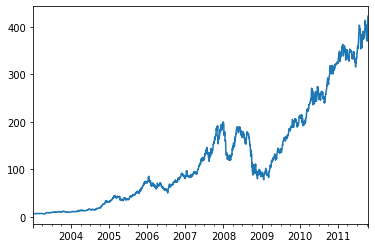

In [605]:
close_px.AAPL.plot()

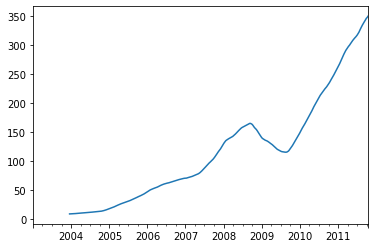

In [607]:
close_px.AAPL.rolling(250).mean().plot()

In [608]:
len(close_px.AAPL)

2292

In [609]:
appl_std250 = close_px.AAPL.rolling(250, min_periods = 10).std()

In [611]:
appl_std250[250:260]

2003-12-18    1.671492
2003-12-19    1.668094
2003-12-22    1.664757
2003-12-23    1.661217
2003-12-24    1.657478
2003-12-25    1.653935
2003-12-26    1.650861
2003-12-29    1.648012
2003-12-30    1.645176
2003-12-31    1.641981
Freq: B, Name: AAPL, dtype: float64

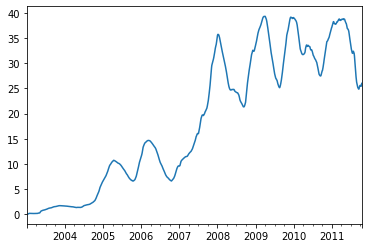

In [612]:
appl_std250.plot()

In [613]:
expanding_mean = appl_std250.expanding().mean()


In [614]:
expanding_mean

2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
2003-01-09          NaN
2003-01-10          NaN
2003-01-13          NaN
2003-01-14          NaN
2003-01-15     0.077496
2003-01-16     0.076128
2003-01-17     0.088208
2003-01-20     0.099159
2003-01-21     0.109184
2003-01-22     0.119155
2003-01-23     0.126241
2003-01-24     0.133478
2003-01-27     0.138930
2003-01-28     0.142849
2003-01-29     0.146396
2003-01-30     0.149034
2003-01-31     0.150964
2003-02-03     0.152422
2003-02-04     0.153470
2003-02-05     0.154168
2003-02-06     0.154590
2003-02-07     0.154969
2003-02-10     0.155165
2003-02-11     0.155210
2003-02-12     0.155126
                ...    
2011-09-05    18.446302
2011-09-06    18.449305
2011-09-07    18.452286
2011-09-08    18.455246
2011-09-09    18.458176
2011-09-12    18.461077
2011-09-13    18.463943
2011-09-14    18.466791
2011-09-15    18.469614
2011-09-16    18.472436
2011-09-19    18

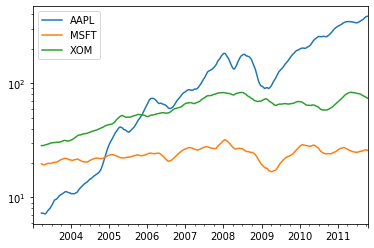

In [615]:
close_px.rolling(60).mean().plot(logy=True)

In [616]:
close_px.rolling('20D').mean()


,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
2003-01-09,7.391667,21.490000,29.273333
2003-01-10,7.387143,21.558571,29.238571
2003-01-13,7.378750,21.633750,29.197500
2003-01-14,7.370000,21.717778,29.194444
2003-01-15,7.355000,21.757000,29.152000


In [617]:
close_px.rolling('20D')

Rolling [window=1728000000000000,min_periods=1,center=False,win_type=freq,axis=0]

# Exponentially Weighted Functions

In [618]:
aapl_px = close_px.AAPL['2006':'2007']

In [619]:
ma60 = aapl_px.rolling(30, min_periods=20).mean()

In [620]:
ewma60 = aapl_px.ewm(span=30).mean()

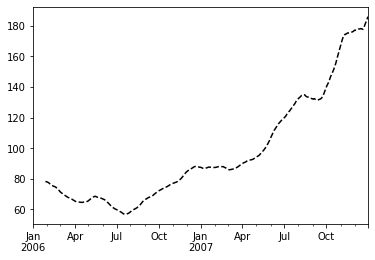

In [621]:
ma60.plot(style='k--', label='Simple MA')

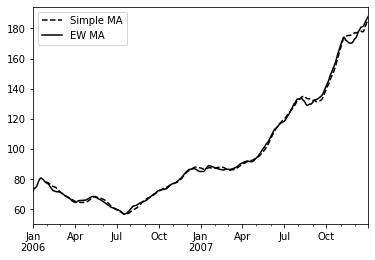

In [626]:
import matplotlib.pyplot as plt
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

# Binary Moving Window Functions

In [627]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

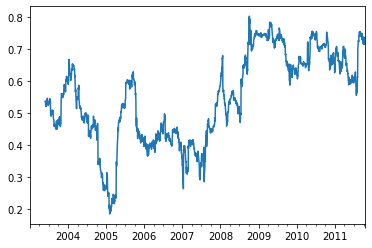

In [639]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

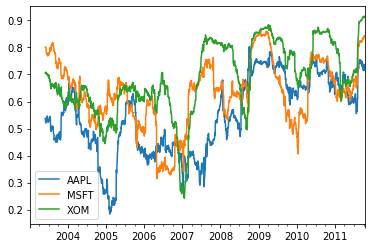

In [640]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

# User-Defined Moving Window Functions

In [641]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x,0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  This is separate from the ipykernel package so we can avoid doing imports until


2003-01-02     NaN
2003-01-03     NaN
2003-01-06     NaN
2003-01-07     NaN
2003-01-08     NaN
2003-01-09     NaN
2003-01-10     NaN
2003-01-13     NaN
2003-01-14     NaN
2003-01-15     NaN
2003-01-16     NaN
2003-01-17     NaN
2003-01-20     NaN
2003-01-21     NaN
2003-01-22     NaN
2003-01-23     NaN
2003-01-24     NaN
2003-01-27     NaN
2003-01-28     NaN
2003-01-29     NaN
2003-01-30     NaN
2003-01-31     NaN
2003-02-03     NaN
2003-02-04     NaN
2003-02-05     NaN
2003-02-06     NaN
2003-02-07     NaN
2003-02-10     NaN
2003-02-11     NaN
2003-02-12     NaN
              ... 
2011-09-05    92.4
2011-09-06    92.4
2011-09-07    92.4
2011-09-08    92.4
2011-09-09    92.4
2011-09-12    92.4
2011-09-13    92.4
2011-09-14    92.4
2011-09-15    92.4
2011-09-16    92.4
2011-09-19    92.0
2011-09-20    92.4
2011-09-21    92.4
2011-09-22    92.4
2011-09-23    92.4
2011-09-26    92.4
2011-09-27    92.4
2011-09-28    92.4
2011-09-29    92.4
2011-09-30    92.8
2011-10-03    92.8
2011-10-04  

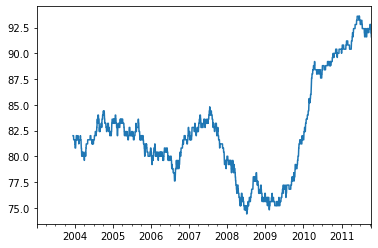

In [642]:
result.plot()


In [643]:
returns.rolling(250).apply(score_at_2percent)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


,AAPL,MSFT,XOM
2003-01-02,NaN,NaN,NaN
2003-01-03,NaN,NaN,NaN
2003-01-06,NaN,NaN,NaN
2003-01-07,NaN,NaN,NaN
2003-01-08,NaN,NaN,NaN
2003-01-09,NaN,NaN,NaN
2003-01-10,NaN,NaN,NaN
2003-01-13,NaN,NaN,NaN
2003-01-14,NaN,NaN,NaN
2003-01-15,NaN,NaN,NaN
